In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageStat, ImageOps
import cv2
from collections import Counter
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
import seaborn as sns
from scipy import stats

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# Set base path
BASE_PATH = r"d:\ecommerce-product-classifier\dataset"

In [13]:
import os
os.getcwd()



'd:\\ecommerce-product-classifier\\dataset\\check'

In [19]:
import os

dataset_path = r"d:\ecommerce-product-classifier\dataset\check"


In [23]:
os.listdir(dataset_path)


['BABY_PRODUCTS',
 'BEAUTY_HEALTH',
 'CLOTHING_ACCESSORIES_JEWELLERY',
 'ELECTRONICS',
 'GROCERY',
 'HOBBY_ARTS_STATIONERY',
 'HOME_KITCHEN_TOOLS',
 'PET_SUPPLIES',
 'SPORTS_OUTDOOR']

In [24]:
BASE_PATH = r"d:\ecommerce-product-classifier\dataset"

In [25]:
os.listdir(BASE_PATH)

['check', 'train', 'val']

In [29]:
import pandas as pd

def scan_split(split_name):
    split_path = os.path.join(BASE_PATH, split_name)
    data = []

    for category in os.listdir(split_path):
        category_path = os.path.join(split_path, category)
        if os.path.isdir(category_path):
            files = os.listdir(category_path)
            for file in files:
                data.append({
                    "split": split_name,
                    "category": category,
                    "file": file
                })

    return pd.DataFrame(data)


In [30]:
df_train = scan_split("train")
df_val   = scan_split("val")
df_check = scan_split("check")

df = pd.concat([df_train, df_val, df_check], ignore_index=True)
df.head()


,split,category,file
0,train,BABY_PRODUCTS,1000_BABY_P_train.jpeg
1,train,BABY_PRODUCTS,1001_BABY_P_train.jpeg
2,train,BABY_PRODUCTS,1002_BABY_P_train.jpeg
3,train,BABY_PRODUCTS,1003_BABY_P_train.jpeg
4,train,BABY_PRODUCTS,1004_BABY_P_train.jpeg


In [31]:
df['split'].value_counts()


split
train    13992
val       3632
check      551
Name: count, dtype: int64

In [32]:
df[df['split'] == 'train']['category'].value_counts()


category
GROCERY                           3978
HOME_KITCHEN_TOOLS                1715
ELECTRONICS                       1353
PET_SUPPLIES                      1260
SPORTS_OUTDOOR                    1235
BEAUTY_HEALTH                     1202
HOBBY_ARTS_STATIONERY             1091
BABY_PRODUCTS                     1087
CLOTHING_ACCESSORIES_JEWELLERY    1071
Name: count, dtype: int64

In [33]:
df[df['split'] == 'val']['category'].value_counts()


category
GROCERY                           1033
HOME_KITCHEN_TOOLS                 445
ELECTRONICS                        351
PET_SUPPLIES                       327
SPORTS_OUTDOOR                     321
BEAUTY_HEALTH                      312
HOBBY_ARTS_STATIONERY              283
BABY_PRODUCTS                      282
CLOTHING_ACCESSORIES_JEWELLERY     278
Name: count, dtype: int64

Matplotlib is building the font cache; this may take a moment.


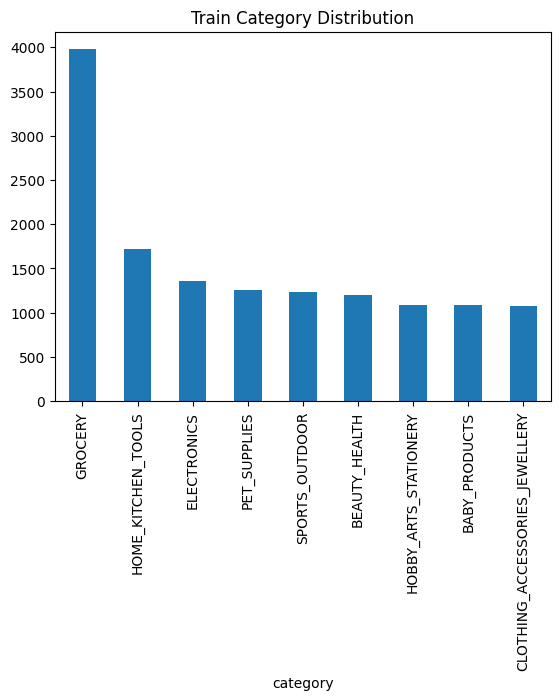

In [35]:
import matplotlib.pyplot as plt

df[df['split'] == 'train']['category'].value_counts().plot(
    kind='bar',
    title='Train Category Distribution'
)
plt.show()


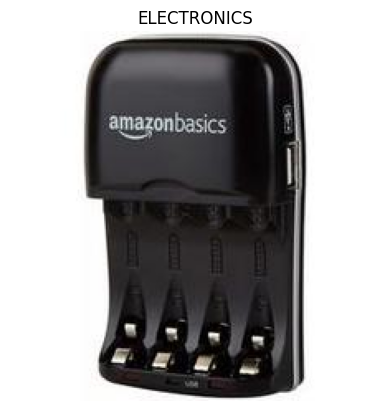

In [36]:
from PIL import Image
import matplotlib.pyplot as plt
import os

BASE_PATH = r"d:\ecommerce-product-classifier\dataset\train"

category = "ELECTRONICS"   # change if needed
img_name = os.listdir(os.path.join(BASE_PATH, category))[0]

img_path = os.path.join(BASE_PATH, category, img_name)

img = Image.open(img_path)

plt.imshow(img)
plt.axis("off")
plt.title(category)
plt.show()
